In [1]:
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt

In [2]:
def get_stream_subsample_between_dates(path, startdate, enddate):
    """
    Produces a subsample of a large stream mseed file bounded
    by start and end dates.
    
    Assumes that only one trace exists in the stream file.
    
    This solution is based on this discussion:
    https://discourse.obspy.org/t/large-miniseed-files-read-in-chunks/1109
    
    Parameters:
    path (str): path to mseed file
    startdate (UTC): startdate of return data
    enddate (UTC): enddate of return data
    
    Returns:
    st (obspy.Stream): stream of subselected data
    """
    
    reclen = 512
    chunksize = 100000 * reclen
    with io.open(path, 'rb') as fh:
        i = 0
        while True:
            with io.BytesIO() as buf:
                c = fh.read(chunksize)
                buf.write(c)
                buf.seek(0, 0)
                
                if 'st' not in locals():
                    st = obspy.read(buf)
                    
                    # delete the stream and move on if its trace is not 
                    # before the starttime
                    if st.traces[0].stats.starttime < startdate:
                        del st

                else:
                    st_new = obspy.read(buf)
                    
                    # if the stream traces start after the enddate
                    # delete stop the loop
                    if st_new.traces[0].stats.starttime > enddate:
                        break
                    else:
                        st = st + st_new
#             if 'st' in locals():
#                 print('stream {i}:'.format(i=i), st)
#                 i += 1
    return st

In [3]:
path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

startdate = obspy.UTCDateTime('2019-05-15T00:00:00Z')
enddate = obspy.UTCDateTime('2019-05-25T00:00:00Z')

st = get_stream_subsample_between_dates(path, startdate=startdate, enddate=enddate)

stream 0: 1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-16T07:38:41.862001Z | 1000.0 Hz, 72617262 samples
stream 1: 2 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-16T07:38:41.862001Z | 1000.0 Hz, 72617262 samples
7F.A00.01.GDH | 2019-05-16T07:38:41.863001Z - 2019-05-17T03:48:30.864001Z | 1000.0 Hz, 72589002 samples
stream 2: 3 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-16T07:38:41.862001Z | 1000.0 Hz, 72617262 samples
7F.A00.01.GDH | 2019-05-16T07:38:41.863001Z - 2019-05-17T03:48:30.864001Z | 1000.0 Hz, 72589002 samples
7F.A00.01.GDH | 2019-05-17T03:48:30.865000Z - 2019-05-17T23:58:15.692000Z | 1000.0 Hz, 72584828 samples
stream 3: 4 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-16T07:38:41.862001Z | 1000.0 Hz, 72617262 samples
7F.A00.01.GDH | 2019-05-16T07:38:41.863001Z - 2019-05-17T03:48:30.864001Z | 1000.0 Hz, 72589002 samples
7F.A00.01.GDH | 2019-05-17T03:48:30.8650

In [ ]:
paths = ['queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'
         , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.1'
         , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.2'
         , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.3'
         , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.4'
         , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.5']


In [5]:
st.merge()

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-25T13:36:19.667001Z | 1000.0 Hz, 871675067 samples

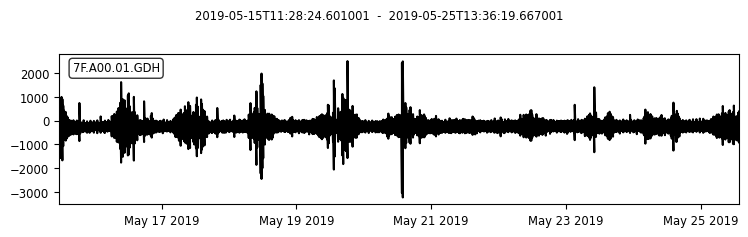

In [15]:
x = st.plot()

In [ ]:
#https://discourse.obspy.org/t/large-miniseed-files-read-in-chunks/1109

path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

i = 0

streams = []

reclen = 512
# chunksize = 100000 * reclen # Around 50 MB
chunksize = 100000 * reclen # Around 50 MB
with io.open(path, "rb") as fh:
    while True:
        with io.BytesIO() as buf:
            c = fh.read(chunksize)
            
            if not c:
                break
            buf.write(c)
            buf.seek(0, 0)
            
            if 'st' not in locals():
                st = obspy.read(buf)
            else:
                st = st + obspy.read(buf)
#             st = obspy.read(buf)
#             streams.append(st)
#             st = obspy.read(buf)
#             if 'st' not in locals():
#                 st = obspy.read(buf)
#             else:
#                 st_new = obspy.read(buf)
#                 st = st.append(st_new)
            
#         # Do something useful!
#         print(st)
        
        if i > 5:
            break
        else:
            i += 1